In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

In [ ]:
m=1
k=1
t_max=1000000
t_steps = 10*t_max

def f_t(t):
    return 0


def f(t, y):
    x, v = y
    dx = v
    dv = (f_t(t) - k*x)/m
    return np.array([dx, dv])

y0 = np.array([1,0])
ts, dt = np.linspace(0,t_max,t_steps, retstep=True)

plt.figure(figsize=[6,3])
for method in ['RK23', 'RK45', 'DOP853']:

    sol = scipy.integrate.solve_ivp(f, [0,t_max], y0=y0, t_eval=ts, method=method)
    # plt.plot(ts, sol.y[0])
    y_max = np.max(sol.y[0].reshape(-1,100), axis=1)
    plt.plot(ts[::100], y_max, label=method)
# plt.plot(ts, sol.y[1])
# plt.show()

x = np.zeros_like(ts)
v = np.zeros_like(ts)
x[0]=1
for i, t in enumerate(ts[:-1]):
    v[i+1] = v[i] + dt*(f_t(t) - k*x[i])
    x[i+1] = x[i] + dt*v[i+1]
       
x_max = np.max(x.reshape(-1,100), axis=1)
plt.plot(ts[::100], x_max, label='leapfrog')
plt.grid()
plt.ylabel(r'$x_{max}$', fontsize=16)
plt.xlabel('t', fontsize=16)
plt.xscale('log')
plt.legend(title='method')
# plt.plot(ts, x)
# plt.plot(ts, v)

plt.savefig('../results/solver_comare.png', dpi=600)


    

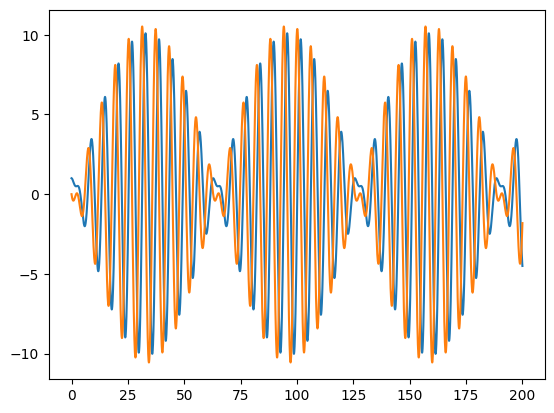

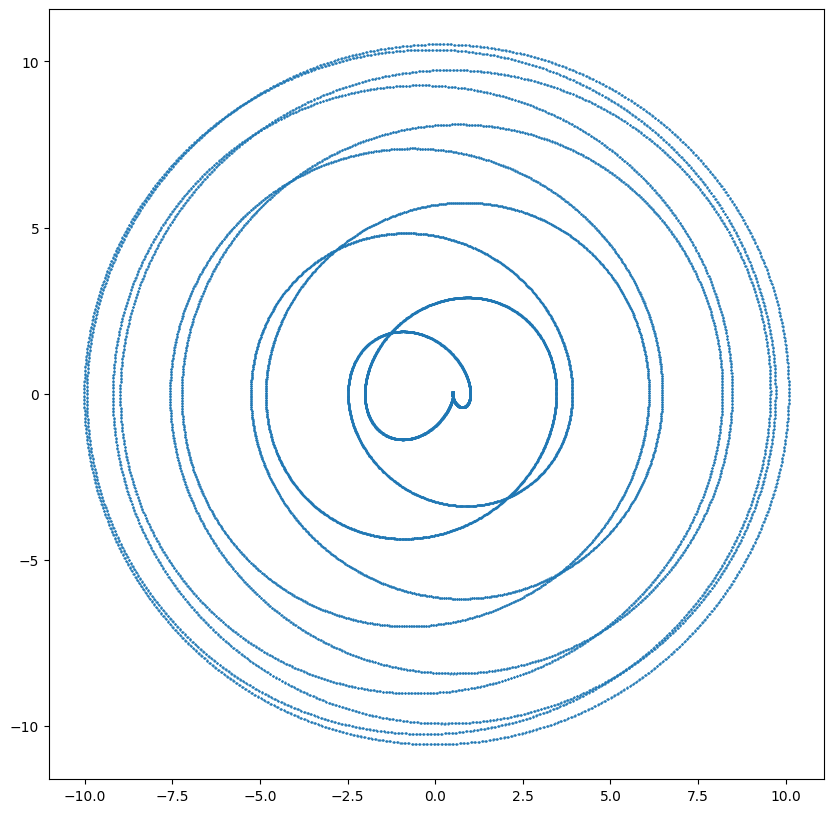

In [32]:
m=1
k=1
t_max=200
t_steps = 100*t_max

def f_t(t):
    return np.sin(1.1*t)


def f(t, y):
    x, v = y
    dx = v
    dv = (f_t(t) - k*x)/m
    return np.array([dx, dv])

y0 = np.array([0,5])
ts, dt = np.linspace(0,t_max,t_steps, retstep=True)

# sol = scipy.integrate.solve_ivp(f, [0,t_max], y0=y0, t_eval=ts, method='DOP853')
# plt.plot(ts, sol.y[0])
# plt.plot(ts, sol.y[1])
# plt.show()

x = np.zeros_like(ts)
v = np.zeros_like(ts)
x[0] =1
for i, t in enumerate(ts[:-1]):
    v[i+1] = v[i] + dt*(f_t(t) - k*x[i])
    x[i+1] = x[i] + dt*v[i+1]
       
plt.plot(ts, x)
plt.plot(ts, v)
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(x, v, s=1, marker='.')



    